In [52]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

import pathlib

import os

*/*.JPG, */*.jpg and */*.* all return different values, meaning the dataset has different file types

In [53]:
train_dir = pathlib.Path('dataset/train')
val_dir = pathlib.Path('dataset/valid')


train_count = len(list(train_dir.glob('*/*.*')))
val_count = len(list(val_dir.glob('*/*.*')))
print(train_count)
print(val_count)


25835
6678


In [54]:
# bacterial_spot = list(data_dir.glob('Tomato___Bacterial_spot/*'))
# early_blight = list(data_dir.glob('Tomato___Early_blight/*'))
# healthy = list(data_dir.glob('Tomato___healthy/*'))
# late_blight = list(data_dir.glob('Tomato___Late_blight/*'))
# leaf_mold = list(data_dir.glob('Tomato___Leaf_Mold/*'))
# septoria_leaf_spot = list(data_dir.glob('Tomato___Septoria_leaf_spot/*'))
# spider_mites = list(data_dir.glob('Tomato___Spider_mites Two-spotted_spider_mite/*'))
# target_spot = list(data_dir.glob('Tomato___Target_Spot/*'))
# mosaic = list(data_dir.glob('Tomato___Tomato_mosaic_virus/*'))
# yellow_leaf_curl = list(data_dir.glob('Tomato___Tomato_Yellow_Leaf_Curl_Virus/*'))

# for img in yellow_leaf_curl:
#     arr = np.array(PIL.Image.open(img))
#     if not (arr.shape == (256, 256, 3)):
#         raise Exception

# subfolders = [ f.path for f in os.scandir('dataset/train') if f.is_dir() ]
# for subdir in subfolders:
#     print(subdir)
#     for file in os.listdir(subdir):
#         if not (file.endswith(".jpg") or file.endswith('JPG') or file.endswith('png') or file.endswith('jpeg')):
#             print(file)
            
    # PIL.Image.open(str(imgs[0]))


# import imghdr

# data_dir = "dataset/valid/Bacterial_spot"
# image_extensions = [".png", ".jpg", "jpeg", "JPG"]  # add there all your images file extensions

# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in pathlib.Path(data_dir).rglob("*"):
#     if filepath.suffix.lower() in image_extensions:
#         img_type = imghdr.what(filepath)
#         if img_type is None:
#             print(f"{filepath} is not an image")
#             os.unlink(filepath)
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
#             os.unlink(filepath)

from os import listdir
import cv2

#for filename in listdir('C:/tensorflow/models/research/object_detection/images/train'):
yourDirectory = 'dataset/valid/'
corrupted = []
for folder in listdir(yourDirectory):
    print(folder)
    for filename in listdir(yourDirectory+folder):
        # if filename.endswith(".jpg"):
        # print(yourDirectory+filename)
        #cv2.imread('C:/tensorflow/models/research/object_detection/images/train/'+filename)
        try:
            cv2.imread(yourDirectory+folder+'/'+filename)
            # print(filename)
        except:
            print(filename)
            corrupted.add(filename)

print(corrupted)

Late_blight
Septoria_leaf_spot
Tomato_Yellow_Leaf_Curl_Virus
powdery_mildew
healthy
Early_blight
Target_Spot
Leaf_Mold
Tomato_mosaic_virus
Bacterial_spot
Spider_mites Two-spotted_spider_mite
[]


In [55]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25835 files belonging to 11 classes.
Found 6678 files belonging to 11 classes.


In [56]:
class_names = train_ds.class_names
print(class_names)

['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus', 'healthy', 'powdery_mildew']


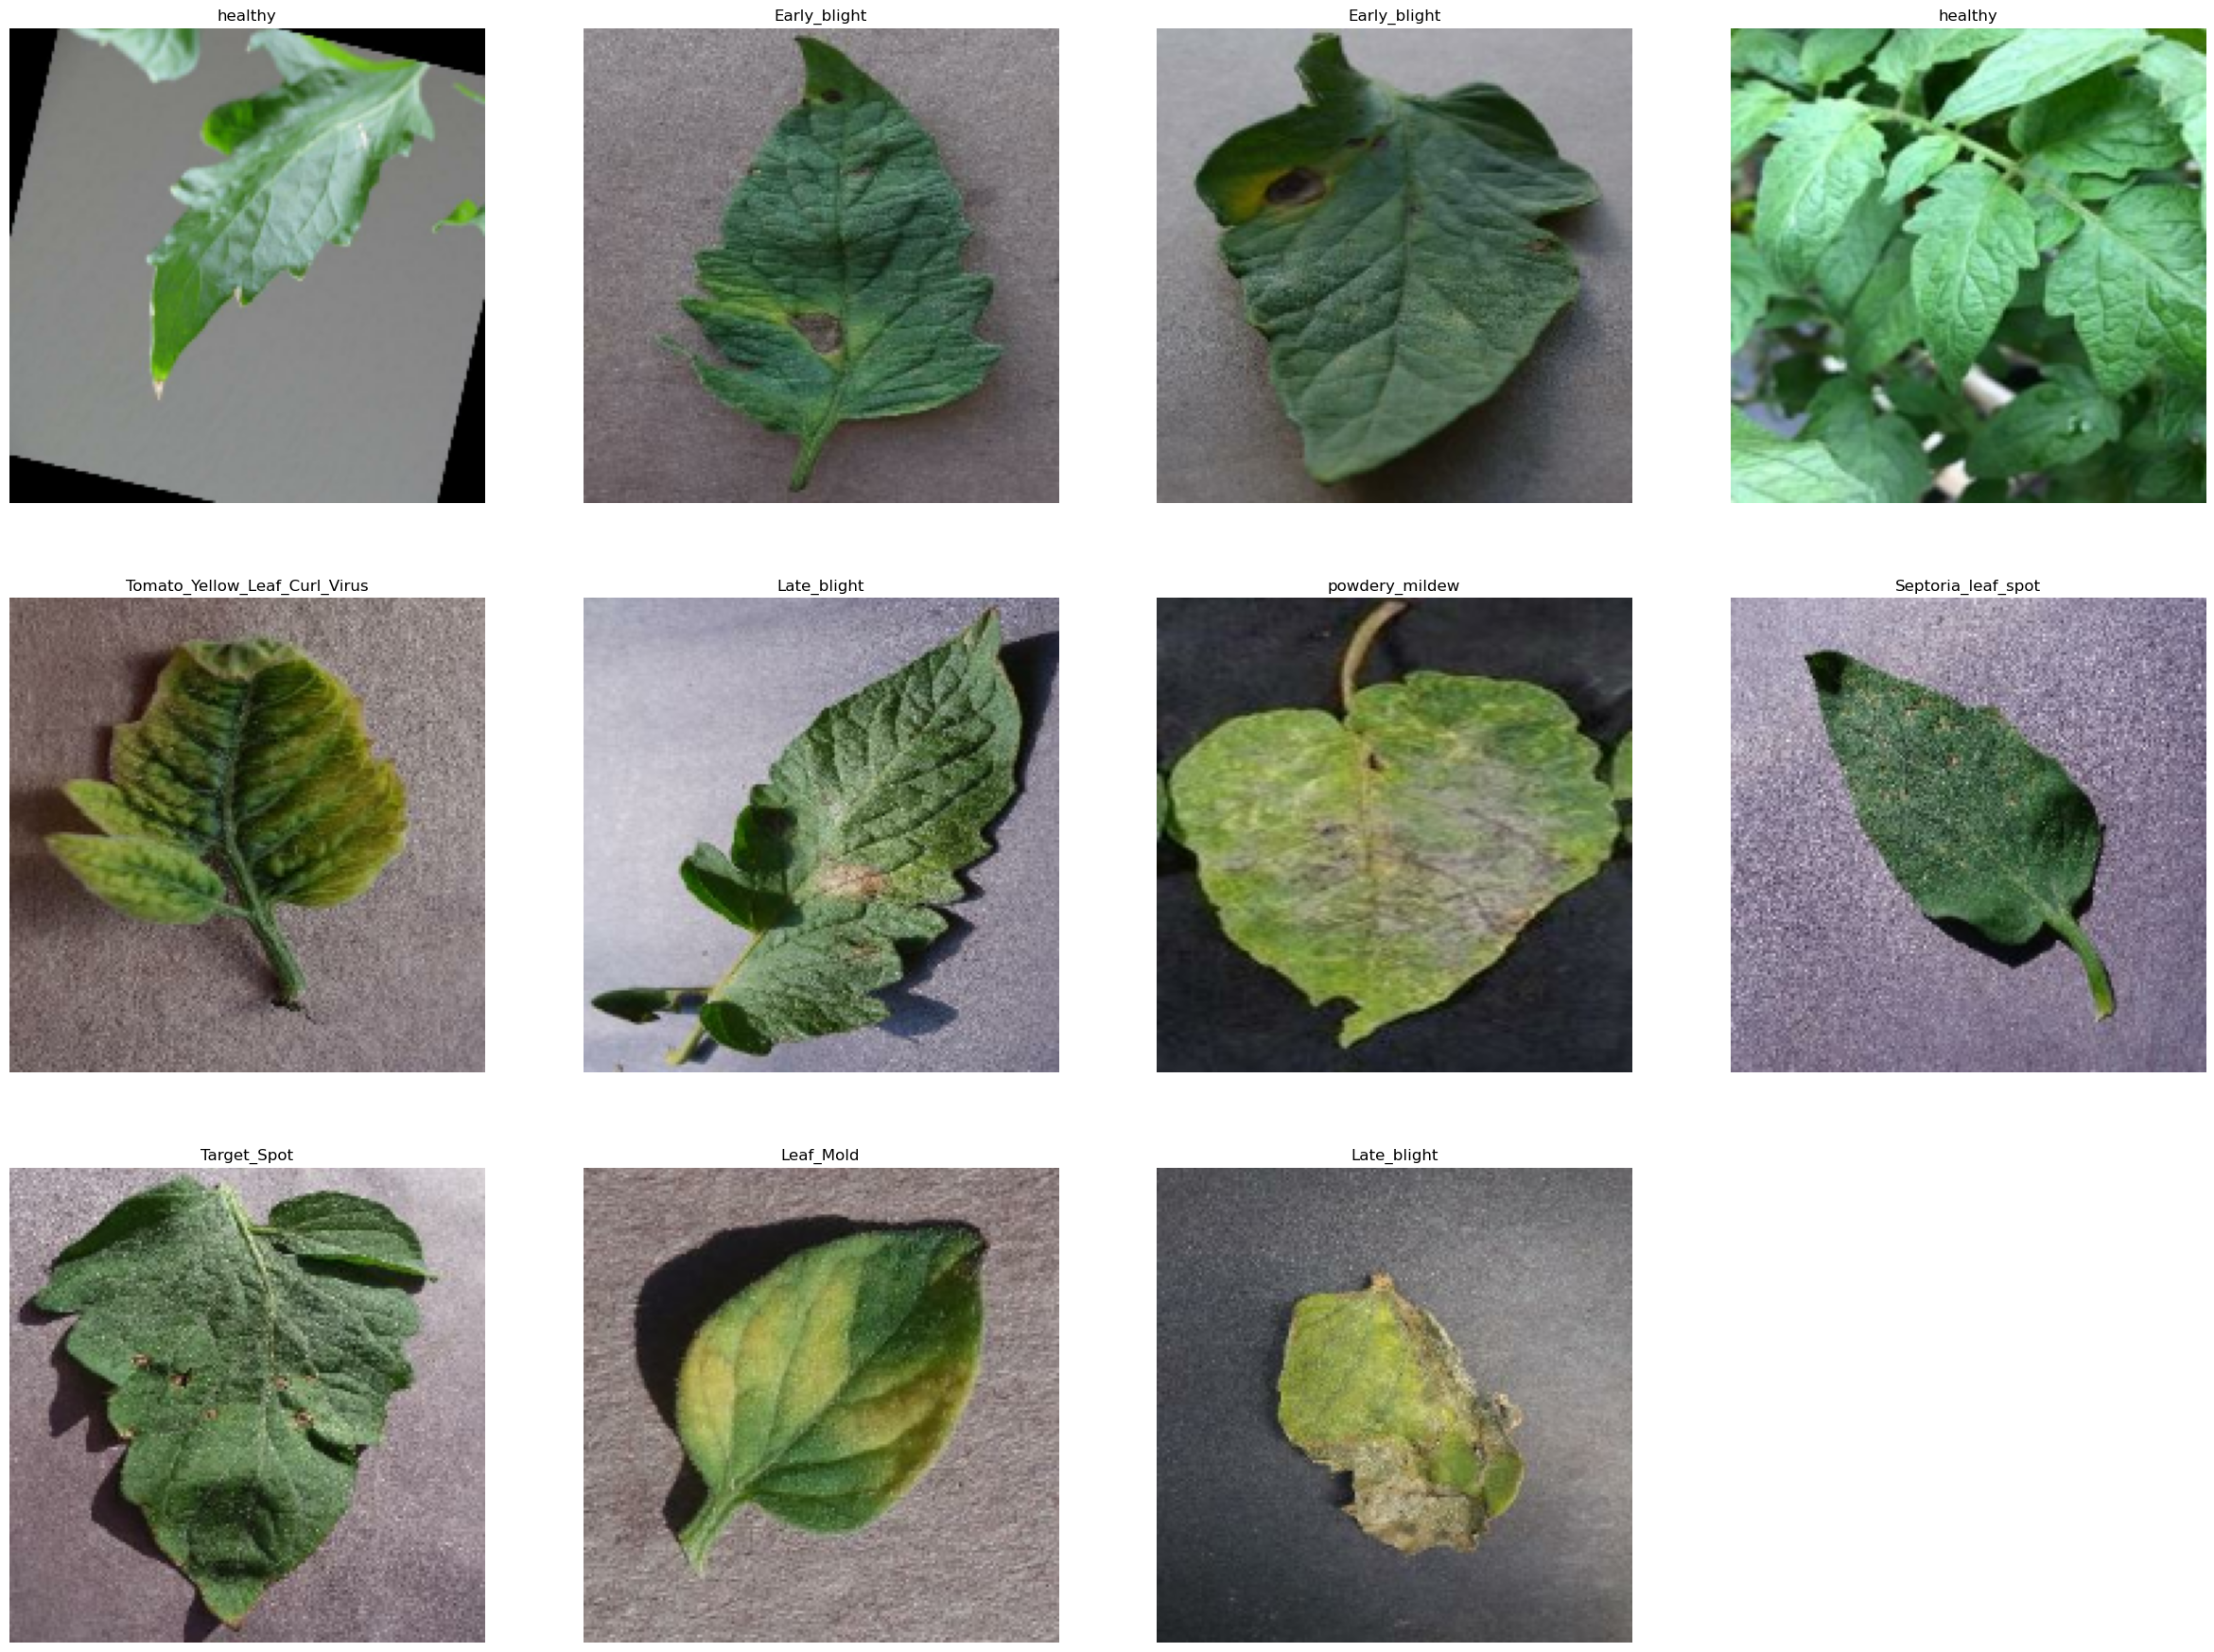

In [57]:
plt.figure(figsize=(30, 30))
for images, labels in train_ds.take(1):
  for i in range(11):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [58]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [59]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [60]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    # layers.RandomCrop(img_height, img_width),
    # layers.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3))
  ]
)

2023-02-14 10:33:58.569848: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 575 of 1000
2023-02-14 10:34:03.338312: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2023-02-14 10:34:04.265693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:06.482769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:08.883409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:09.826771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:10.732689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:11.507195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:12.390013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:13.136463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:14.259484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:15.026998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:15.883356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:16.613642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:17.466167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:18.457872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:19.293103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:20.025809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:20.905786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:21.720275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:22.857461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:23.718281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:24.584548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-14 10:34:25.445339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


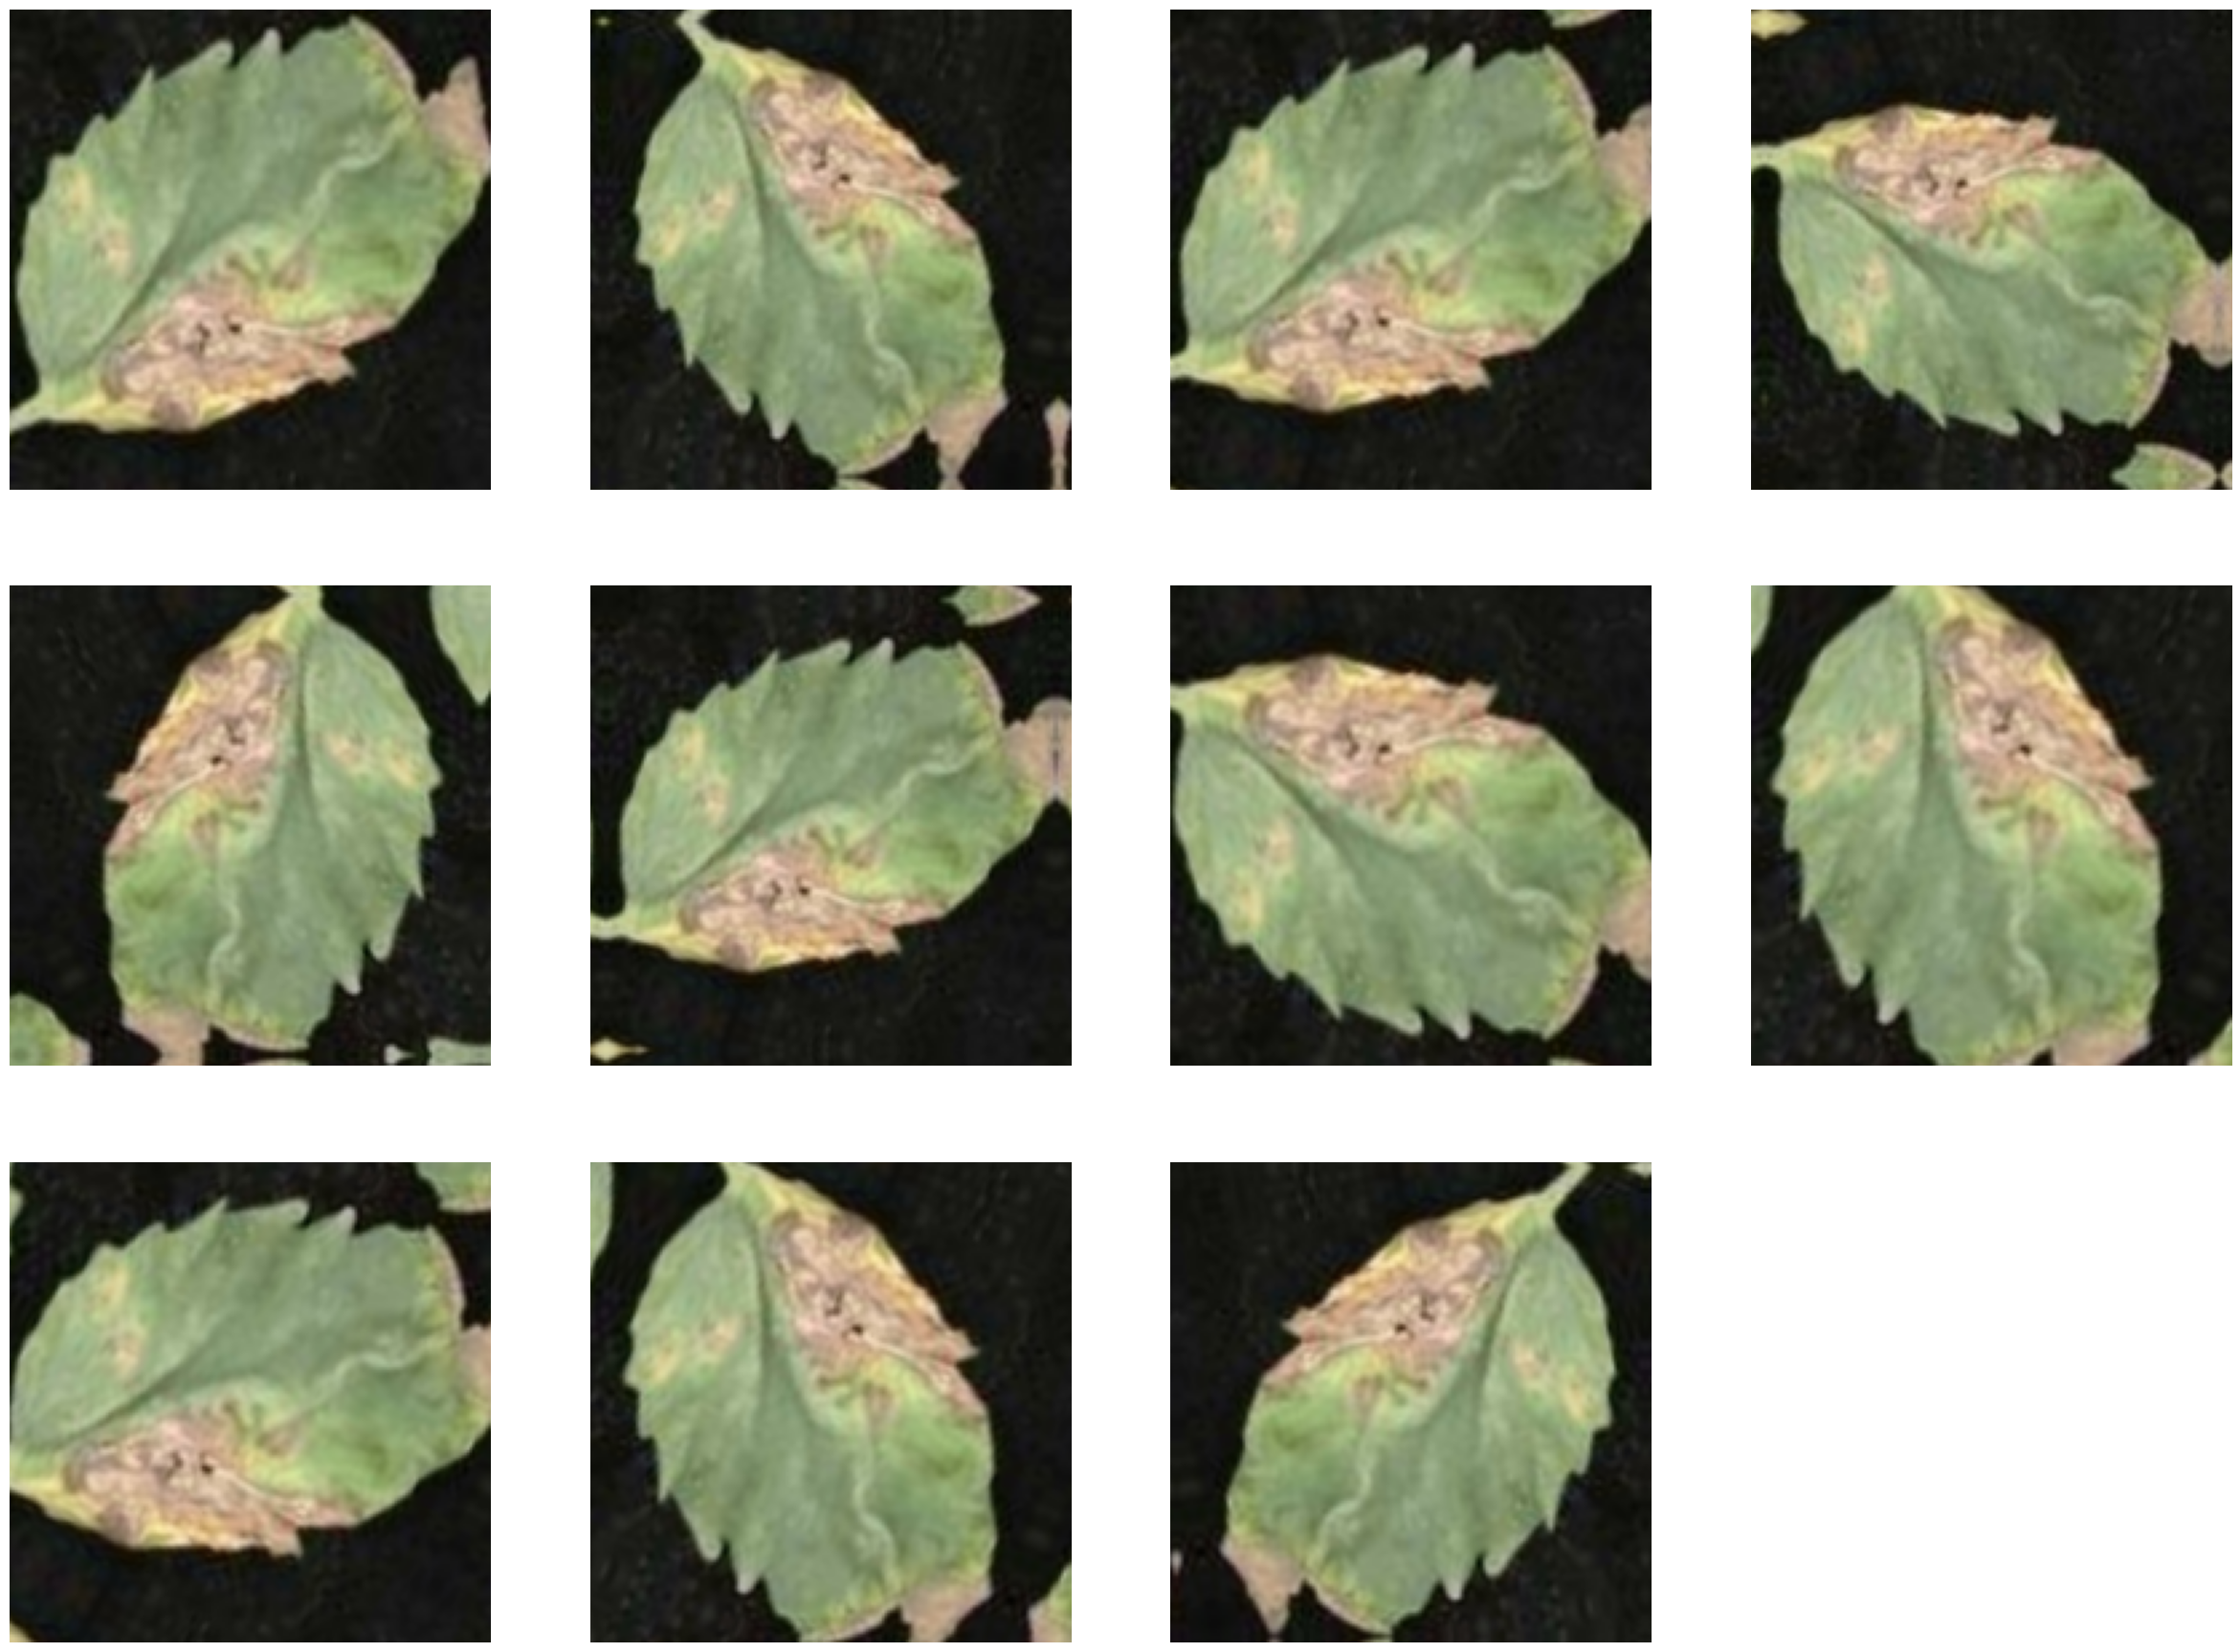

In [61]:
plt.figure(figsize=(30, 30))
for images, _ in train_ds.take(1):
  for i in range(11):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [62]:
num_classes = len(class_names)

model = Sequential([
  layers.CenterCrop(180, 180),
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [63]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [64]:
epochs=35
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/35


2023-02-14 10:34:29.751412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-14 10:34:32.040894: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x113ffcf80
2023-02-14 10:34:32.040942: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x113ffcf80
2023-02-14 10:34:32.050084: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x113ffcf80
2023-02-14 10:34:32.050128: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x113ffcf80
2023-02-14 10:34:32.104471: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOU

NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_8' defined at (most recent call last):
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/qf/vw9dzh494wd2yqv7qpcv886h0000gn/T/ipykernel_37576/2812488153.py", line 2, in <module>
      history = model.fit(
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      except Exception as e:  # pylint: disable=broad-except
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      `ParameterServerStrategy`. Note that the progress bar is not
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      `tf.data` dataset, and 'steps_per_epoch'
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      you can pass a 2D array with shape
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      to a weight (float) value, used for weighting the loss function
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/keras/engine/training.py", line 1027, in train_step
      """Runs a single training step."""
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      ...   initial_learning_rate=.01, decay_steps=20, decay_rate=.1)
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
    File "/opt/homebrew/Caskroom/miniconda/base/envs/project/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
Node: 'StatefulPartitionedCall_8'
could not find registered platform with id: 0x113ffcf80
	 [[{{node StatefulPartitionedCall_8}}]] [Op:__inference_train_function_134524]

In [ ]:
import datetime

# print(str(datetime.datetime.now()))
model.save('saved_model/model'+str(datetime.datetime.now()))

: 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

: 

In [ ]:
model.evaluate(val_ds)

: 

CLASSIFY NEW DATA

In [ ]:
leaf_path = pathlib.Path('mosaic2.png')

img = tf.keras.utils.load_img(
    leaf_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

: 